---
---

# Regression Discontinuity Design


## Mastering 'Metrics


---
---

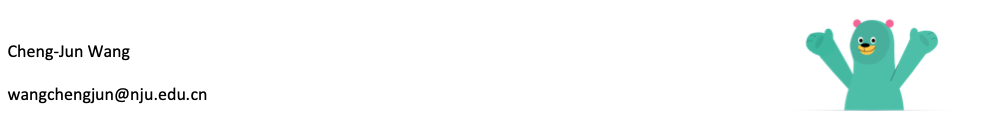

http://www.masteringmetrics.com/resources/

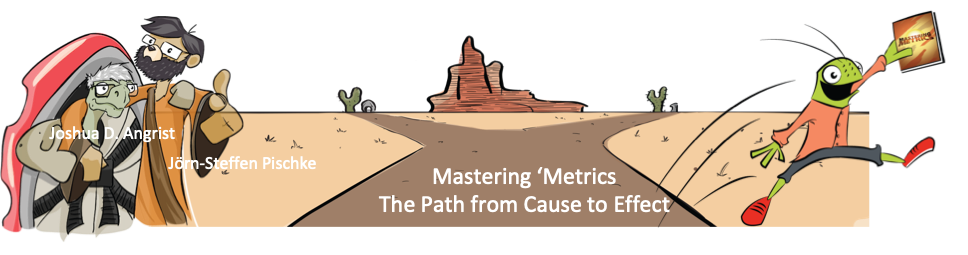

Human behavior is constrained by rules.
> American over-21s can drink legally.

- The rules that constrain the role of chance in human affairs often generate interesting experiments
    - Regression discontinuity design




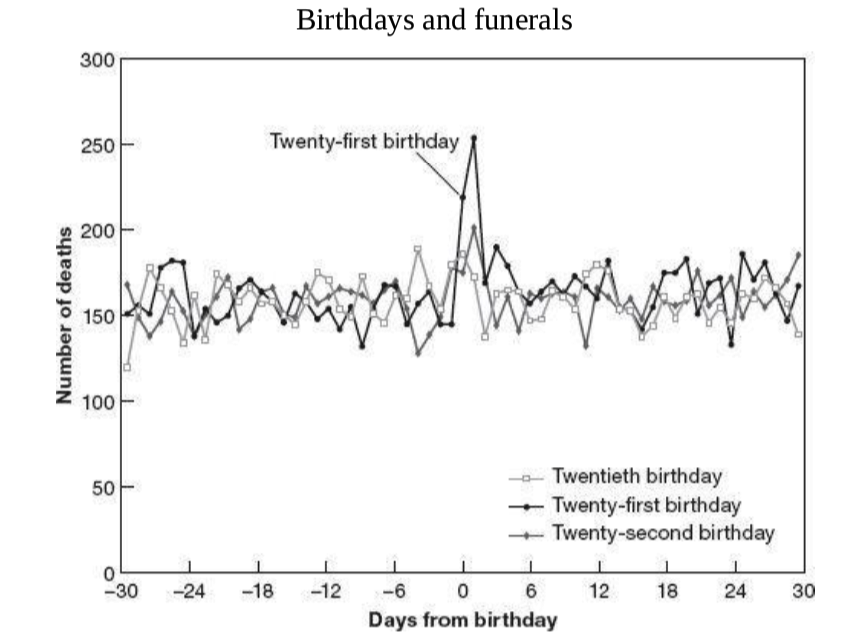

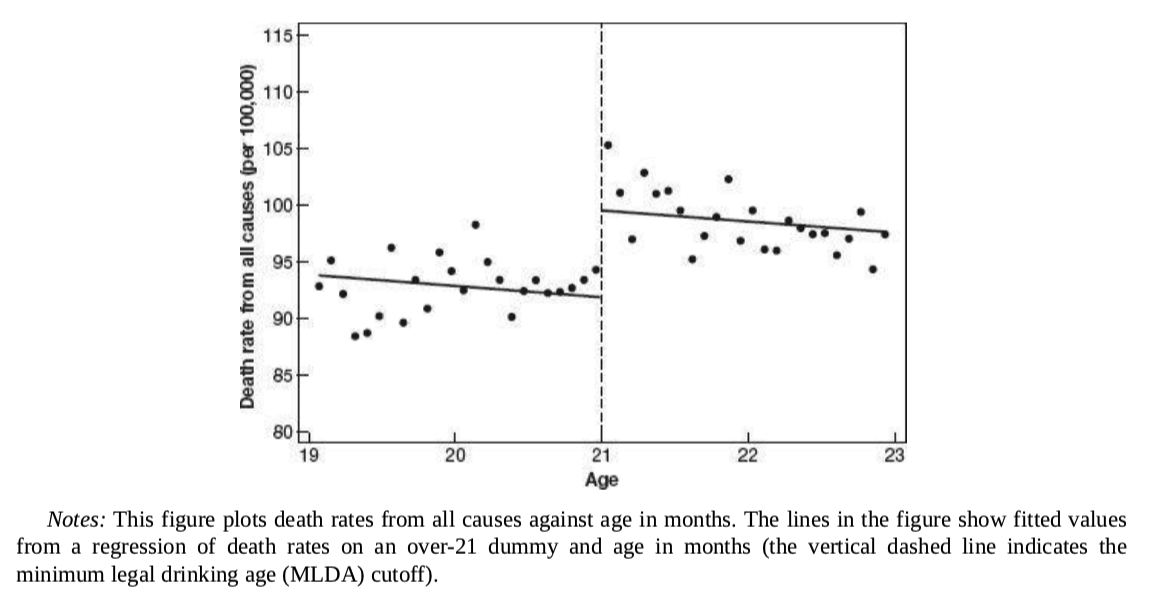

The causal question is about the effect of legal access to alcohol on death rates.

The treatment variable can be written $D_i$ which is a determininistic and discontinuous function of age $x_i$.

\begin{equation}
\label{eq6}
D_{i} =\left\{
\begin{aligned}
1 & , & if\   x_i \geq x_0, \\
0 & , & if\  x_i < x_0.
\end{aligned}
\right.
\end{equation}

$$\bar{M_a} = \alpha +\rho D_a + \gamma(x-x_0) +\delta[(x-x_0)D_a] +  \epsilon_a$$

- Sharp RD 
    - keneral regression
        - local linear regression
        - triangular kernel or rectangular kernel
            - local Wald estimator
- Fuzzy RD


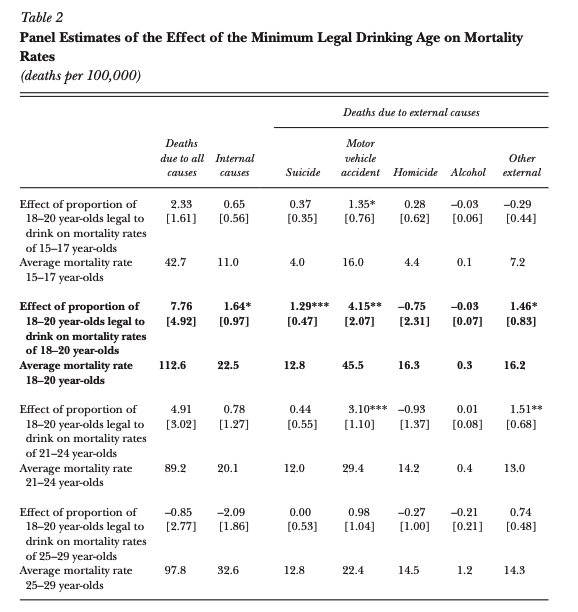

Carpenter and Dobkin (2009);Carpenter and Dobkin (2011)
http://masteringmetrics.com/wp-content/uploads/2015/01/Carpenter-and-Dobkin-2011.pdf

In [3]:
ssc install rd, replace

checking rd consistency and verifying not already installed...
installing into /Users/datalab/Library/Application Support/Stata/ado/plus/...
installation complete.


http://www.masteringmetrics.com/resources/

* ReadMe_MLDA.txt **

This folder contains the data and programs used to generate Table 4.1 and Figures 4.2, 4.4, and 4.5 in Mastering Metrics. Table 4.1 presents sharp RD estimates of the effect of the minimum legal drinking age (MLDA) on mortality.

Data: 
* /MLDA/Data/AEJfigs.dta

Code: 
* /MLDA/Code/master_cd_rd.do

In [63]:
** Metrics
*** Figures 4.2 4.4 4.5
*** Tables 4.1
*** MLDA Regression Discontinuity (based on data from Carpenter and Dobkin 2009)
* Gabriel Kreindler, June 13, 2014
* Modified (lightly) by Jon Petkun, January 20, 2015

clear

// set to directory where data is located
cd "/Users/datalab/bigdata/mastering_metrics_data/"

use AEJfigs



/Users/datalab/bigdata/mastering_metrics_data



In [64]:
d


Contains data from AEJfigs.dta
  obs:            50                          
 vars:            19                          6 Aug 2012 14:44
 size:         3,800                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
agecell         float   %9.0g                 Age Cell
all             float   %9.0g                 All
allfitted       float   %9.0g                 All Fitted
internal        float   %9.0g                 Internal
internalfitted  float   %9.0g                 Internal Fitted
external        float   %9.0g                 External
externalfitted  float   %9.0g                 External Fitted
alcohol         float   %9.0g                 Alcohol
alcoholfitted   float   %9.0g                 Alcohol Fitted
homicide        float   %9.0g       

In [65]:
* All = all deaths
gen age = agecell - 21
gen over21 = agecell >= 21

gen age2 = age^2
gen over_age = over21*age
gen over_age2 = over21*age2
gen exactly21 = agecell >= 21 & agecell < 21.1
* doesn't change 
* drop if agecell>20.99 & agecell<21.01
* Other causes
gen ext_oth = external - homicide - suicide - mva








(2 missing values generated)


In [66]:
rd all age, gr mbw(100)

Two variables specified; treatment is 
assumed to jump from zero to one at Z=0. 

 Assignment variable Z is age
 Treatment variable X_T unspecified
 Outcome variable y is all

Command used for graph: lpoly; Kernel used: triangle (default)
Bandwidth: 1.6561289; loc Wald Estimate: 9.0007406
(52 missing values generated)
(52 missing values generated)
(52 missing values generated)
Estimating for bandwidth 1.656128905436896
------------------------------------------------------------------------------
         all |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lwald |   9.000741    1.48031     6.08   0.000     6.099386     11.9021
------------------------------------------------------------------------------


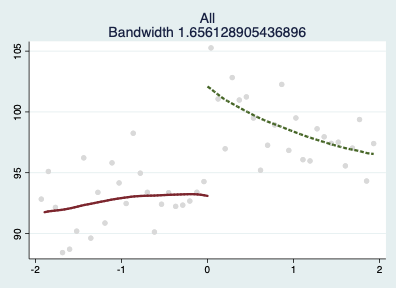

In [75]:
rd all age, gr mbw(100) cov(over_age over_age2 age2)

Two variables specified; treatment is 
assumed to jump from zero to one at Z=0. 

 Assignment variable Z is age
 Treatment variable X_T unspecified
 Outcome variable y is all

Command used for graph: lpoly; Kernel used: triangle (default)
Bandwidth: 1.6561289; loc Wald Estimate: 9.0007406
(52 missing values generated)
(52 missing values generated)
(52 missing values generated)
Estimating for bandwidth 1.656128905436896
------------------------------------------------------------------------------
         all |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lwald |   10.26666   2.103346     4.88   0.000     6.144176    14.38914
------------------------------------------------------------------------------


In [76]:
rd all age,gr bdep oxline

Two variables specified; treatment is 
assumed to jump from zero to one at Z=0. 

 Assignment variable Z is age
 Treatment variable X_T unspecified
 Outcome variable y is all

Command used for graph: lpoly; Kernel used: triangle (default)
Bandwidth: 1.6561289; loc Wald Estimate: 9.0007406
Bandwidth: .82806445; loc Wald Estimate: 9.5787993
Bandwidth: 3.3122578; loc Wald Estimate: 7.9525311
(52 missing values generated)
(52 missing values generated)
(52 missing values generated)
Estimating for bandwidth 1.656128905436896
Estimating for bandwidth .828064452718448
Estimating for bandwidth 3.312257810873792
------------------------------------------------------------------------------
         all |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lwald |   9.000741    1.48031     6.08   0.000     6.099386     11.9021
     lwald50 |   9.578799   1.914144     5.00   0.000     5.827146    13.3

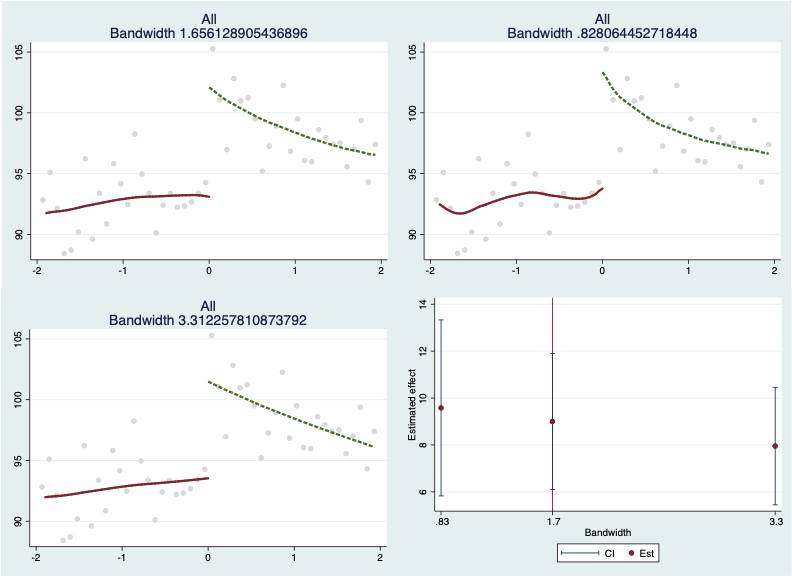

In [96]:
rd alcohol age, gr mbw(100) 
*cov(internal)

Two variables specified; treatment is 
assumed to jump from zero to one at Z=0. 

 Assignment variable Z is age
 Treatment variable X_T unspecified
 Outcome variable y is alcohol

Command used for graph: lpoly; Kernel used: triangle (default)
Bandwidth: .96071859; loc Wald Estimate: .86140437
(52 missing values generated)
(52 missing values generated)
(52 missing values generated)
Estimating for bandwidth .9607185859928868
------------------------------------------------------------------------------
     alcohol |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lwald |   .8614044   .3434056     2.51   0.012     .1883417    1.534467
------------------------------------------------------------------------------


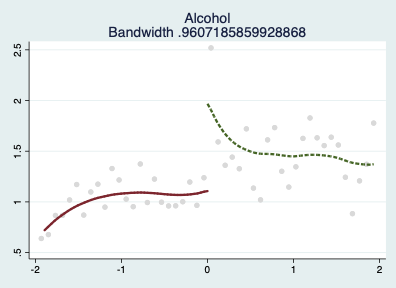

In [85]:
rd suicide age, gr mbw(100)

Two variables specified; treatment is 
assumed to jump from zero to one at Z=0. 

 Assignment variable Z is age
 Treatment variable X_T unspecified
 Outcome variable y is suicide

Command used for graph: lpoly; Kernel used: triangle (default)
Bandwidth: 1.5740979; loc Wald Estimate: 1.82858
(52 missing values generated)
(52 missing values generated)
(52 missing values generated)
Estimating for bandwidth 1.574097921237909
------------------------------------------------------------------------------
     suicide |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lwald |    1.82858   .6407107     2.85   0.004       .57281     3.08435
------------------------------------------------------------------------------


In [97]:
rd suicide age, gr mbw(100) 
*cov(mva)

Two variables specified; treatment is 
assumed to jump from zero to one at Z=0. 

 Assignment variable Z is age
 Treatment variable X_T unspecified
 Outcome variable y is suicide

Command used for graph: lpoly; Kernel used: triangle (default)
Bandwidth: 1.5740979; loc Wald Estimate: 1.82858
(52 missing values generated)
(52 missing values generated)
(52 missing values generated)
Estimating for bandwidth 1.574097921237909
------------------------------------------------------------------------------
     suicide |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lwald |    1.82858   .6407107     2.85   0.004       .57281     3.08435
------------------------------------------------------------------------------


In [93]:
rd mva age, gr mbw(100)

Two variables specified; treatment is 
assumed to jump from zero to one at Z=0. 

 Assignment variable Z is age
 Treatment variable X_T unspecified
 Outcome variable y is mva

Command used for graph: lpoly; Kernel used: triangle (default)
Bandwidth: 1.2108655; loc Wald Estimate: 4.9767589
(52 missing values generated)
(52 missing values generated)
(52 missing values generated)
Estimating for bandwidth 1.21086547235394
------------------------------------------------------------------------------
         mva |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lwald |   4.976759   1.058982     4.70   0.000     2.901193    7.052325
------------------------------------------------------------------------------


In [92]:
rd drugs age, gr mbw(100)

Two variables specified; treatment is 
assumed to jump from zero to one at Z=0. 

 Assignment variable Z is age
 Treatment variable X_T unspecified
 Outcome variable y is drugs

Command used for graph: lpoly; Kernel used: triangle (default)
Bandwidth: .89067171; loc Wald Estimate: -.01270298
(52 missing values generated)
(52 missing values generated)
(52 missing values generated)
Estimating for bandwidth .890671713243247
------------------------------------------------------------------------------
       drugs |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lwald |   -.012703   .2170915    -0.06   0.953    -.4381945    .4127886
------------------------------------------------------------------------------


In [90]:
rd homicide age, gr mbw(100) 
*cov(external)

Two variables specified; treatment is 
assumed to jump from zero to one at Z=0. 

 Assignment variable Z is age
 Treatment variable X_T unspecified
 Outcome variable y is homicide

Command used for graph: lpoly; Kernel used: triangle (default)
Bandwidth: .92968091; loc Wald Estimate: -.1132846
(52 missing values generated)
(52 missing values generated)
(52 missing values generated)
Estimating for bandwidth .9296809139397043
------------------------------------------------------------------------------
    homicide |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lwald |  -1.230137    .666053    -1.85   0.065    -2.535577    .0753027
------------------------------------------------------------------------------


In [36]:
* Regressions for Figure 4.2.
* linear trend, and linear on each side
reg all age over21
predict allfitlin
reg all age over21 over_age
predict allfitlini



      Source |       SS           df       MS      Number of obs   =        48
-------------+----------------------------------   F(2, 45)        =     32.99
       Model |  410.138151         2  205.069075   Prob > F        =    0.0000
    Residual |  279.682408        45  6.21516463   R-squared       =    0.5946
-------------+----------------------------------   Adj R-squared   =    0.5765
       Total |  689.820559        47  14.6770332   Root MSE        =     2.493

------------------------------------------------------------------------------
         all |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |  -.9746843   .6324613    -1.54   0.130    -2.248527    .2991581
      over21 |   7.662709   1.440286     5.32   0.000     4.761824    10.56359
       _cons |   91.84137   .8050394   114.08   0.000     90.21994     93.4628
-------------------------------------------------

In [37]:
* Regressions for Figure 4.4.
* Quadratic, and quadratic on each side
reg all age age2 over21
predict allfitq
reg all age age2 over21 over_age over_age2
predict allfitqi



      Source |       SS           df       MS      Number of obs   =        48
-------------+----------------------------------   F(3, 44)        =     28.12
       Model |  453.339903         3  151.113301   Prob > F        =    0.0000
    Residual |  236.480656        44  5.37456037   R-squared       =    0.6572
-------------+----------------------------------   Adj R-squared   =    0.6338
       Total |  689.820559        47  14.6770332   Root MSE        =    2.3183

------------------------------------------------------------------------------
         all |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |  -.9746843   .5881378    -1.66   0.105    -2.159998    .2106296
        age2 |  -.8186505   .2887482    -2.84   0.007    -1.400584   -.2367167
      over21 |   7.662709   1.339349     5.72   0.000     4.963428    10.36199
       _cons |   92.90274   .8370061   110.99   0

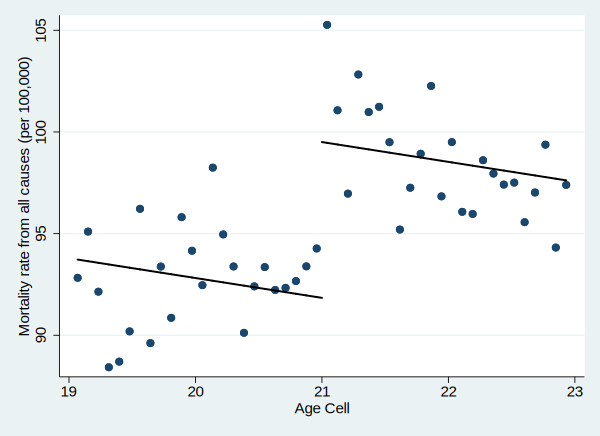

In [38]:
label variable all       "Mortality rate from all causes (per 100,000)"
label variable allfitlin "Mortality rate from all causes (per 100,000)"
label variable allfitqi  "Mortality rate from all causes (per 100,000)"

* Figure 4.2. 
twoway (scatter all agecell) (line allfitlin agecell if age < 0,  lcolor(black)     lwidth(medthick)) ///
                             (line allfitlin agecell if age >= 0, lcolor(black red) lwidth(medthick medthick)), legend(off)


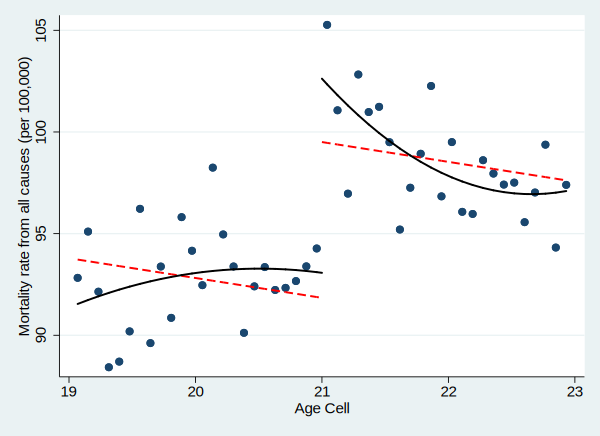

In [39]:
* Figure 4.4.
twoway (scatter all agecell) (line allfitlin allfitqi agecell if age < 0,  lcolor(red black) lwidth(medthick medthick) lpattern(dash)) ///
                             (line allfitlin allfitqi agecell if age >= 0, lcolor(red black) lwidth(medthick medthick) lpattern(dash)), legend(off)

In [40]:
* Regressions for Fig 4.5
* "Motor Vehicle Accidents" on linear, and quadratic on each side
reg mva age over21
predict exfitlin
reg mva age age2 over21 over_age over_age2
predict exfitqi

reg suicide age over21
predict sufitlin

* "Internal causes" on linear, and quadratic on each side
reg internal age over21
predict infitlin
reg internal age age2 over21 over_age over_age2
predict infitqi



      Source |       SS           df       MS      Number of obs   =        48
-------------+----------------------------------   F(2, 45)        =     53.14
       Model |  187.819794         2   93.909897   Prob > F        =    0.0000
    Residual |  79.5215648        45  1.76714588   R-squared       =    0.7025
-------------+----------------------------------   Adj R-squared   =    0.6893
       Total |  267.341359        47  5.68811402   Root MSE        =    1.3293

------------------------------------------------------------------------------
         mva |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |  -3.148829   .3372437    -9.34   0.000    -3.828073   -2.469585
      over21 |   4.534033   .7679953     5.90   0.000     2.987211    6.080855
       _cons |   29.35597   .4292665    68.39   0.000     28.49138    30.22055
-------------------------------------------------

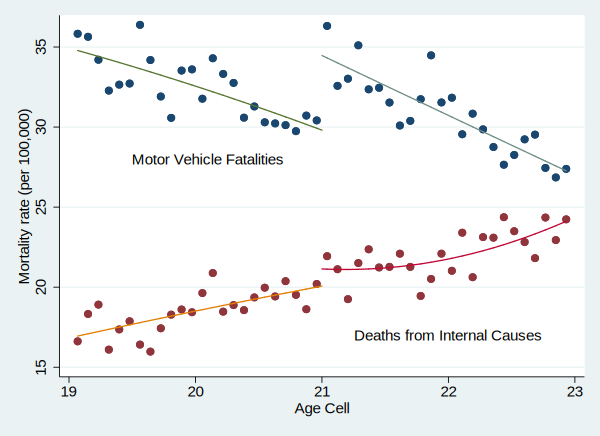

In [41]:
label variable mva  "Mortality rate (per 100,000)"
label variable infitqi  "Mortality rate (per 100,000)"
label variable exfitqi  "Mortality rate (per 100,000)"

* figure 4.5
twoway (scatter  mva internal agecell) (line exfitqi infitqi agecell if agecell < 21) ///
                                       (line exfitqi infitqi agecell if agecell >= 21), ///
                                       legend(off) text(28 20.1 "Motor Vehicle Fatalities") ///
                                                   text(17 22 "Deaths from Internal Causes")

In [42]:
* Table 4.1
* dummy for first month after 21st birthday
gen exactly21 = agecell >= 21 & agecell < 21.1

* doesn't change 
* drop if agecell>20.99 & agecell<21.01

* Other causes
gen ext_oth = external - homicide - suicide - mva



(2 missing values generated)


In [43]:
foreach x in all mva suicide homicide ext_oth internal alcohol {

quietly reg `x' age over21, robust
if ("`x'"=="all"){
	outreg2 over21 using table41.xls, replace bdec(2) sdec(2) noaster excel
}
else{
	outreg2 over21 using table41.xls, append  bdec(2) sdec(2) noaster excel
}

quietly reg `x' age age2 over21 over_age over_age2, robust
outreg2 over21 using table41.xls, append bdec(2) sdec(2) noaster excel

quietly reg `x' age over21 if agecell >= 20 & agecell <= 22, robust
outreg2 over21 using table41.xls, append bdec(2) sdec(2) noaster excel

quietly reg `x' age age2 over21 over_age over_age2 if agecell >= 20 & agecell <= 22, robust
outreg2 over21 using table41.xls, append bdec(2) sdec(2) noaster excel

}




table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout
table41.xls
dir : seeout


|              |        |        |        |         |        |        |        |        |         |         |         |         |          |          |          |          |         |         |         |         |          |          |          |          |         |         |         |         |
| ------------ | ------ | ------ | ------ | ------- | ------ | ------ | ------ | ------ | ------- | ------- | ------- | ------- | -------- | -------- | -------- | -------- | ------- | ------- | ------- | ------- | -------- | -------- | -------- | -------- | ------- | ------- | ------- | ------- |
|              | (1)    | (2)    | (3)    | (4)     | (5)    | (6)    | (7)    | (8)    | (9)     | (10)    | (11)    | (12)    | (13)     | (14)     | (15)     | (16)     | (17)    | (18)    | (19)    | (20)    | (21)     | (22)     | (23)     | (24)     | (25)    | (26)    | (27)    | (28)    |
| VARIABLES    | all    | all    | all    | all     | mva    | mva    | mva    | mva    | suicide | suicide | suicide | suicide | homicide | homicide | homicide | homicide | ext_oth | ext_oth | ext_oth | ext_oth | internal | internal | internal | internal | alcohol | alcohol | alcohol | alcohol |
|              |        |        |        |         |        |        |        |        |         |         |         |         |          |          |          |          |         |         |         |         |          |          |          |          |         |         |         |         |
| age          | -0.97  | -0.83  | -3.26  | 9.40    | -3.15  | -2.93  | -3.47  | 0.68   | -0.18   | 0.14    | -0.01   | 1.48    | 0.22     | 1.32     | 0.22     | 4.44     | 0.53    | -0.86   | 0.01    | 0.05    | 1.60     | 1.50     | -0.01    | 2.75     | 0.00    | -0.42   | -0.33   | 0.36    |
|              | (0.66) | (2.85) | (1.92) | (7.00)  | (0.31) | (1.63) | (1.09) | (3.82) | (0.21)  | (0.61)  | (0.62)  | (2.04)  | (0.20)   | (0.83)   | (0.48)   | (2.90)   | (0.19)  | (1.17)  | (0.64)  | (2.90)  | (0.25)   | (1.34)   | (0.69)   | (2.55)   | (0.09)  | (0.24)  | (0.27)  | (0.53)  |
| age2         |        | -0.84  |        | 11.16   |        | -0.19  |        | 4.46   |         | 0.06    |         | 1.41    |          | 0.27     |          | 3.44     |         | -0.92   |         | -0.76   |          | -0.06    |          | 2.62     |         | -0.29   |         | 0.34    |
|              |        | (1.54) |        | (8.82)  |        | (0.82) |        | (4.72) |         | (0.30)  |         | (2.13)  |          | (0.42)   |          | (2.61)   |         | (0.57)  |         | (3.05)  |          | (0.69)   |          | (2.51)   |         | (0.11)  |         | (0.49)  |
| over21       | 7.66   | 9.55   | 9.75   | 9.61    | 4.53   | 4.66   | 4.76   | 5.89   | 1.79    | 1.81    | 1.72    | 1.30    | 0.10     | 0.20     | 0.16     | -0.45    | 0.84    | 1.80    | 1.41    | 1.63    | 0.39     | 1.07     | 1.69     | 1.25     | 0.44    | 0.80    | 0.74    | 1.03    |
|              | (1.51) | (1.83) | (2.06) | (2.29)  | (0.72) | (1.09) | (1.08) | (1.33) | (0.50)  | (0.78)  | (0.73)  | (1.14)  | (0.45)   | (0.50)   | (0.59)   | (0.93)   | (0.42)  | (0.56)  | (0.59)  | (0.75)  | (0.54)   | (0.80)   | (0.74)   | (1.01)   | (0.21)  | (0.32)  | (0.33)  | (0.41)  |
| over_age     |        | -6.02  |        | -24.45  |        | -0.82  |        | -15.17 |         | -0.70   |         | -0.39   |          | -2.49    |          | -4.70    |         | -0.13   |         | -1.37   |          | -1.87    |          | -2.83    |         | -0.23   |         | -3.11   |
|              |        | (4.53) |        | (11.76) |        | (2.73) |        | (6.35) |         | (1.74)  |         | (4.89)  |          | (1.10)   |          | (4.19)   |         | (1.61)  |         | (4.25)  |          | (2.01)   |          | (4.23)   |         | (0.69)  |         | (1.76)  |
| over_age2    |        | 2.90   |        | -0.87   |        | 0.20   |        | 6.97   |         | 0.03    |         | -2.63   |          | 0.15     |          | -3.79    |         | 1.48    |         | 1.30    |          | 1.05     |          | -2.72    |         | 0.55    |         | 1.77    |
|              |        | (2.26) |        | (13.11) |        | (1.30) |        | (7.05) |         | (0.83)  |         | (4.56)  |          | (0.55)   |          | (3.78)   |         | (0.78)  |         | (4.58)  |          | (0.99)   |          | (4.30)   |         | (0.31)  |         | (1.60)  |
| Constant     | 91.84  | 93.07  | 91.71  | 94.34   | 29.36  | 29.81  | 29.59  | 30.19  | 11.45   | 11.70   | 11.64   | 11.92   | 16.86    | 17.60    | 17.10    | 18.07    | 14.08   | 13.90   | 13.89   | 14.16   | 20.09    | 20.07    | 19.49    | 20.00    | 1.04    | 0.99    | 0.91    | 1.14    |
|              | (0.71) | (0.78) | (0.97) | (0.85)  | (0.34) | (0.49) | (0.54) | (0.56) | (0.24)  | (0.29)  | (0.35)  | (0.33)  | (0.25)   | (0.38)   | (0.34)   | (0.67)   | (0.22)  | (0.40)  | (0.32)  | (0.51)  | (0.27)   | (0.49)   | (0.38)   | (0.61)   | (0.09)  | (0.11)  | (0.14)  | (0.12)  |
|              |        |        |        |         |        |        |        |        |         |         |         |         |          |          |          |          |         |         |         |         |          |          |          |          |         |         |         |         |
| Observations | 48     | 48     | 24     | 24      | 48     | 48     | 24     | 24     | 48      | 48      | 24      | 24      | 48       | 48       | 24       | 24       | 48      | 48      | 24      | 24      | 48       | 48       | 24       | 24       | 48      | 48      | 24      | 24      |
| R-squared    | 0.595  | 0.682  | 0.703  | 0.752   | 0.703  | 0.722  | 0.474  | 0.603  | 0.475   | 0.489   | 0.541   | 0.548   | 0.171    | 0.394    | 0.095    | 0.293    | 0.580   | 0.642   | 0.476   | 0.527   | 0.799    | 0.808    | 0.494    | 0.508    | 0.422   | 0.526   | 0.416   | 0.584   |
|              |        |        |        |         |        |        |        |        |         |         |         |         |          |          |          |          |         |         |         |         |          |          |          |          |         |         |         |         |

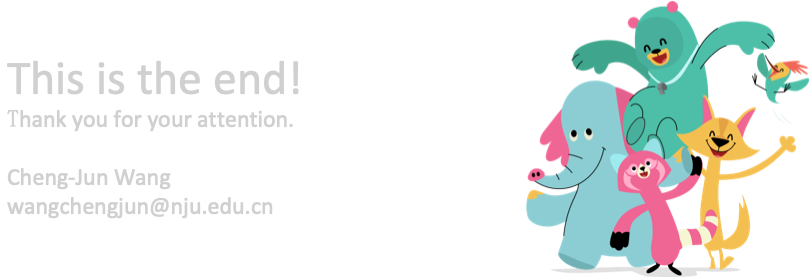